In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r"C:\Users\Toyosi\Documents\Quantium\QVI_transaction_data.csv")
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [4]:
df1['DATE'] = pd.to_datetime(df1['DATE'], unit='D', origin='1899-12-30')
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [5]:
df1['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [6]:
unique_words = df1['PROD_NAME'].unique()
split_words = [word for words in unique_words for word in words.split()]
split_words

['Natural',
 'Chip',
 'Compny',
 'SeaSalt175g',
 'CCs',
 'Nacho',
 'Cheese',
 '175g',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips',
 'Chicken',
 '170g',
 'Smiths',
 'Chip',
 'Thinly',
 'S/Cream&Onion',
 '175g',
 'Kettle',
 'Tortilla',
 'ChpsHny&Jlpno',
 'Chili',
 '150g',
 'Old',
 'El',
 'Paso',
 'Salsa',
 'Dip',
 'Tomato',
 'Mild',
 '300g',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 '&',
 'Vinegar',
 '330g',
 'Grain',
 'Waves',
 'Sweet',
 'Chilli',
 '210g',
 'Doritos',
 'Corn',
 'Chip',
 'Mexican',
 'Jalapeno',
 '150g',
 'Grain',
 'Waves',
 'Sour',
 'Cream&Chives',
 '210G',
 'Kettle',
 'Sensations',
 'Siracha',
 'Lime',
 '150g',
 'Twisties',
 'Cheese',
 '270g',
 'WW',
 'Crinkle',
 'Cut',
 'Chicken',
 '175g',
 'Thins',
 'Chips',
 'Light&',
 'Tangy',
 '175g',
 'CCs',
 'Original',
 '175g',
 'Burger',
 'Rings',
 '220g',
 'NCC',
 'Sour',
 'Cream',
 '&',
 'Garden',
 'Chives',
 '175g',
 'Doritos',
 'Corn',
 'Chip',
 'Southern',
 'Chicken',
 '150g',
 'Cheezels',
 'Cheese',
 'Box',
 '125g',
 'Smiths

In [7]:
word_to_drop = ['&']
new_list = [word for word in split_words if word not in word_to_drop]

In [8]:
newer_list = [word for word in new_list if '0' not in word and '1' not in word and '2' not in word and '3' not in word]
newer_list

['Natural',
 'Chip',
 'Compny',
 'CCs',
 'Nacho',
 'Cheese',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips',
 'Chicken',
 'Smiths',
 'Chip',
 'Thinly',
 'S/Cream&Onion',
 'Kettle',
 'Tortilla',
 'ChpsHny&Jlpno',
 'Chili',
 'Old',
 'El',
 'Paso',
 'Salsa',
 'Dip',
 'Tomato',
 'Mild',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 'Vinegar',
 'Grain',
 'Waves',
 'Sweet',
 'Chilli',
 'Doritos',
 'Corn',
 'Chip',
 'Mexican',
 'Jalapeno',
 'Grain',
 'Waves',
 'Sour',
 'Cream&Chives',
 'Kettle',
 'Sensations',
 'Siracha',
 'Lime',
 'Twisties',
 'Cheese',
 'WW',
 'Crinkle',
 'Cut',
 'Chicken',
 'Thins',
 'Chips',
 'Light&',
 'Tangy',
 'CCs',
 'Original',
 'Burger',
 'Rings',
 'NCC',
 'Sour',
 'Cream',
 'Garden',
 'Chives',
 'Doritos',
 'Corn',
 'Chip',
 'Southern',
 'Chicken',
 'Cheezels',
 'Cheese',
 'Box',
 'Smiths',
 'Crinkle',
 'Original',
 'Infzns',
 'Crn',
 'Crnchers',
 'Tangy',
 'Gcamole',
 'Kettle',
 'Sea',
 'Salt',
 'And',
 'Vinegar',
 'Smiths',
 'Chip',
 'Thinly',
 'Cut',
 'Original',
 'Kettle

In [9]:
from collections import Counter
word_count = Counter(newer_list)
most_common_words = word_count.most_common()
most_common_words

[('Chips', 21),
 ('Smiths', 16),
 ('Crinkle', 14),
 ('Cut', 14),
 ('Kettle', 13),
 ('Cheese', 12),
 ('Salt', 12),
 ('Original', 10),
 ('Chip', 9),
 ('Salsa', 9),
 ('Doritos', 9),
 ('Corn', 8),
 ('Pringles', 8),
 ('RRD', 8),
 ('Chicken', 7),
 ('WW', 7),
 ('Sour', 6),
 ('Sea', 6),
 ('Thinly', 5),
 ('Vinegar', 5),
 ('Chilli', 5),
 ('Thins', 5),
 ('Crisps', 5),
 ('Natural', 4),
 ('Cream', 4),
 ('Red', 4),
 ('Rock', 4),
 ('Deli', 4),
 ('Supreme', 4),
 ('Infuzions', 4),
 ('CCs', 3),
 ('Tortilla', 3),
 ('Old', 3),
 ('El', 3),
 ('Paso', 3),
 ('Dip', 3),
 ('Tomato', 3),
 ('Mild', 3),
 ('Sweet', 3),
 ('Sensations', 3),
 ('Lime', 3),
 ('Twisties', 3),
 ('Soy', 3),
 ('Cobs', 3),
 ('Popd', 3),
 ('Woolworths', 3),
 ('Tostitos', 3),
 ('Nacho', 2),
 ('Grain', 2),
 ('Waves', 2),
 ('Tangy', 2),
 ('Burger', 2),
 ('Rings', 2),
 ('Chives', 2),
 ('Cheezels', 2),
 ('And', 2),
 ('Thai', 2),
 ('BBQ', 2),
 ('SR', 2),
 ('Swt', 2),
 ('French', 2),
 ('ChipCo', 2),
 ('Smith', 2),
 ('Honey', 2),
 ('Tyrrells', 2),
 (

In [10]:
Salsa = ['Salsa']
without_salsa = [word for word in newer_list if word not in Salsa]
without_salsa

['Natural',
 'Chip',
 'Compny',
 'CCs',
 'Nacho',
 'Cheese',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips',
 'Chicken',
 'Smiths',
 'Chip',
 'Thinly',
 'S/Cream&Onion',
 'Kettle',
 'Tortilla',
 'ChpsHny&Jlpno',
 'Chili',
 'Old',
 'El',
 'Paso',
 'Dip',
 'Tomato',
 'Mild',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 'Vinegar',
 'Grain',
 'Waves',
 'Sweet',
 'Chilli',
 'Doritos',
 'Corn',
 'Chip',
 'Mexican',
 'Jalapeno',
 'Grain',
 'Waves',
 'Sour',
 'Cream&Chives',
 'Kettle',
 'Sensations',
 'Siracha',
 'Lime',
 'Twisties',
 'Cheese',
 'WW',
 'Crinkle',
 'Cut',
 'Chicken',
 'Thins',
 'Chips',
 'Light&',
 'Tangy',
 'CCs',
 'Original',
 'Burger',
 'Rings',
 'NCC',
 'Sour',
 'Cream',
 'Garden',
 'Chives',
 'Doritos',
 'Corn',
 'Chip',
 'Southern',
 'Chicken',
 'Cheezels',
 'Cheese',
 'Box',
 'Smiths',
 'Crinkle',
 'Original',
 'Infzns',
 'Crn',
 'Crnchers',
 'Tangy',
 'Gcamole',
 'Kettle',
 'Sea',
 'Salt',
 'And',
 'Vinegar',
 'Smiths',
 'Chip',
 'Thinly',
 'Cut',
 'Original',
 'Kettle',
 'Origi

In [11]:
df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [12]:
condition = df1[df1['PROD_QTY'] == 200]
condition

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [13]:
Card_nbr = 226000
mask = df1['LYLTY_CARD_NBR'] == Card_nbr
df1 = df1[~mask]

In [14]:
df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [15]:
transactions_counts_by_date = df1.groupby('DATE')['TOT_SALES'].count().reset_index(name='transaction_count')
transactions_counts_by_date

,DATE,transaction_count
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


In [16]:
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
counts = df1['TXN_ID'].value_counts()
sns.barplot(x=df1['DATE'], y=counts, color="b")
#plt.plot(df1['DATE'], df1['TXN_ID'], marker='o', linestyle='--', color='b')
plt.title('Transactions Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.grid(True)
plt.show()

KeyboardInterrupt: 

<Figure size 1500x600 with 0 Axes>

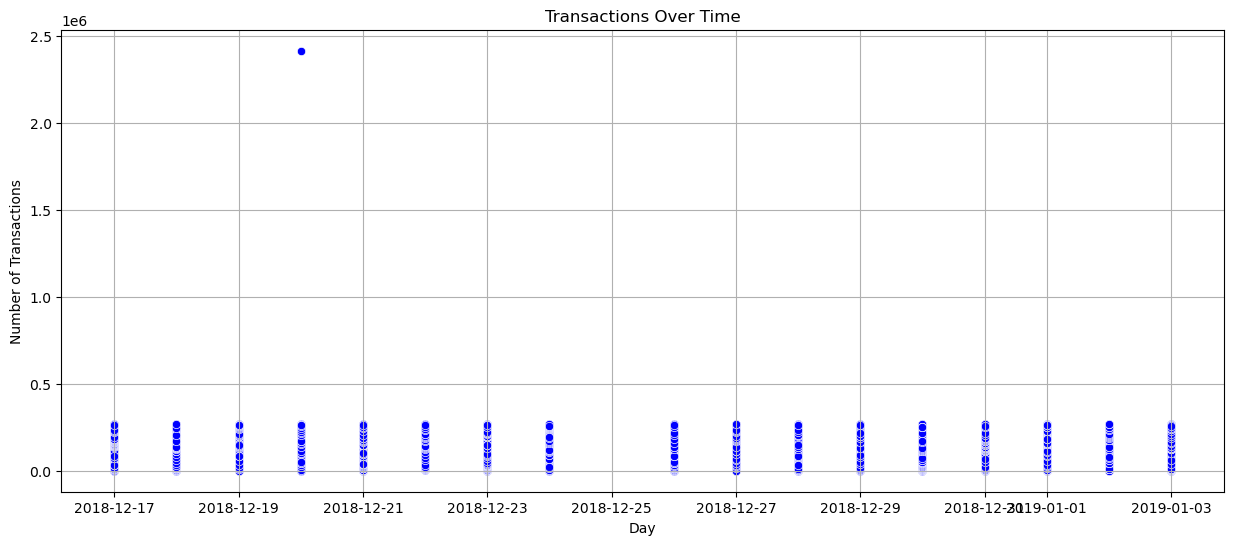

In [ ]:
start_date = '2018-12-17'
end_date = '2019-01-03'

filtered_data = df1[(df1['DATE'] >= start_date) & (df1['DATE'] <= end_date)]
counts = filtered_data['TXN_ID'].value_counts()

plt.figure(figsize=(15, 6))
sns.scatterplot(x=filtered_data['DATE'], y=filtered_data['TXN_ID'], color="b")
#plt.plot(filtered_data['DATE'], filtered_data['TXN_ID'], marker='o', linestyle='-', color='b')
plt.title('Transactions Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()